<a href="https://colab.research.google.com/github/Alishapunw/Genre-Forecasting-for-Netflix/blob/main/Final_Project_Business_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Goal:  We aim to forecast genres which will be popular in the future for Netflix to create content (Netflix Originals)**
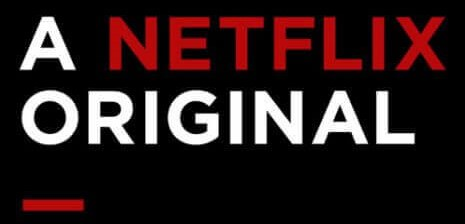

# **Step 1: Uploading and Analyzing the data we will be using to make predictions**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,  r2_score
from sklearn.preprocessing import OneHotEncoder


# Load data
file_path = 'Consolidated Genre File1.xlsx'
data = pd.read_excel(file_path)
df = pd.DataFrame(data)
numerical_features = ['Rating', 'Runtime (Mins)', 'Number of Votes', 'Gross Revenue ( USD)','Release Year']  # Adjust as necessary
print("Data loaded successfully with shape:", data.shape)
data.head()

Data loaded successfully with shape: (192103, 9)


,Genre Name,Title,IMDb ID,Release Year,Rating,Runtime (Mins),Certificate,Number of Votes,Gross Revenue ( USD)
0,Western,Killers of the Flower Moon,tt5537002,2023.0,9.5,206.0,R,903,NaN
1,Western,Yellowstone,tt4236770,2018.0,8.7,60.0,TV-MA,178710,NaN
2,Western,1923,tt18335752,2022.0,8.4,60.0,TV-MA,36095,NaN
3,Western,Justified,tt1489428,2010.0,8.6,44.0,TV-MA,105686,NaN
4,Western,1883,tt13991232,2021.0,8.7,60.0,TV-MA,94206,NaN


from matplotlib import pyplot as plt
_df_0['Release Year'].plot(kind='hist', bins=20, title='Release Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Runtime (Mins)'].plot(kind='hist', bins=20, title='Runtime (Mins)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Number of Votes'].plot(kind='hist', bins=20, title='Number of Votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('IMDb ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Certificate').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Release Year', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Rating', y='Runtime (Mins)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Runtime (Mins)', y='Number of Votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Release Year'].plot(kind='line', figsize=(8, 4), title='Release Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Runtime (Mins)'].plot(kind='line', figsize=(8, 4), title='Runtime (Mins)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Number of Votes'].plot(kind='line', figsize=(8, 4), title='Number of Votes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['IMDb ID'].value_counts()
    for x_label, grp in _df_14.groupby('Title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Title')
_ = plt.ylabel('IMDb ID')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Certificate'].value_counts()
    for x_label, grp in _df_15.groupby('IMDb ID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('IMDb ID')
_ = plt.ylabel('Certificate')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Release Year', y='Title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['IMDb ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Release Year', y='IMDb ID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Certificate'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Release Year', y='Certificate', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Rating', y='Title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192103 entries, 0 to 192102
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Genre Name            192103 non-null  object 
 1   Title                 192103 non-null  object 
 2   IMDb ID               192103 non-null  object 
 3   Release Year          192094 non-null  float64
 4   Rating                192103 non-null  float64
 5   Runtime (Mins)        174819 non-null  float64
 6   Certificate           125894 non-null  object 
 7   Number of Votes       192103 non-null  int64  
 8   Gross Revenue ( USD)  33337 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 13.2+ MB


In [ ]:
print(data[numerical_features].isnull().sum())

Rating                       0
Runtime (Mins)           17284
Number of Votes              0
Gross Revenue ( USD)    158766
Release Year                 9
dtype: int64


# **Step 2: Visualing the data with missing values**

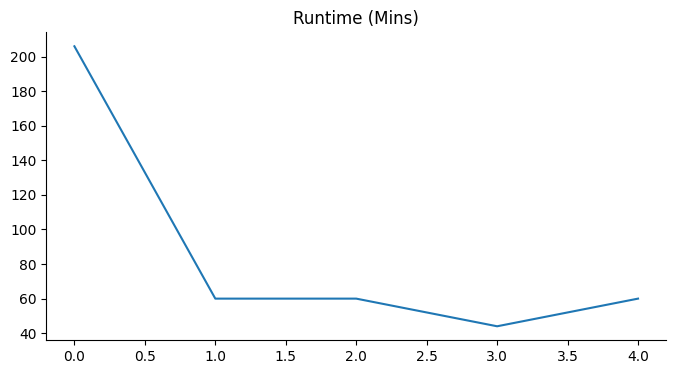

In [ ]:
from matplotlib import pyplot as plt
_df_1['Runtime (Mins)'].plot(kind='line', figsize=(8, 4), title='Runtime (Mins)')
plt.gca().spines[['top', 'right']].set_visible(False)

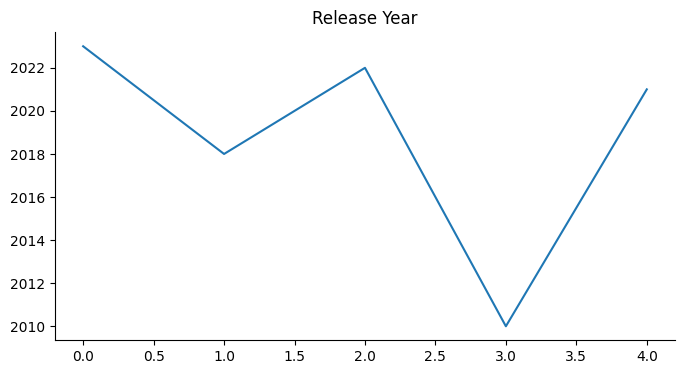

In [ ]:
from matplotlib import pyplot as plt
_df_10['Release Year'].plot(kind='line', figsize=(8, 4), title='Release Year')
plt.gca().spines[['top', 'right']].set_visible(False)

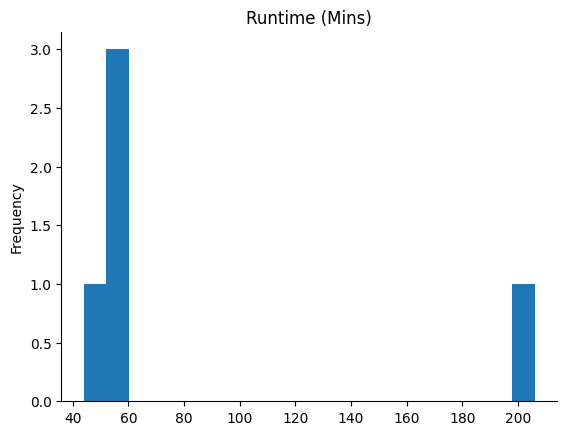

In [ ]:
from matplotlib import pyplot as plt
_df_2['Runtime (Mins)'].plot(kind='hist', bins=20, title='Runtime (Mins)')
plt.gca().spines[['top', 'right',]].set_visible(False)

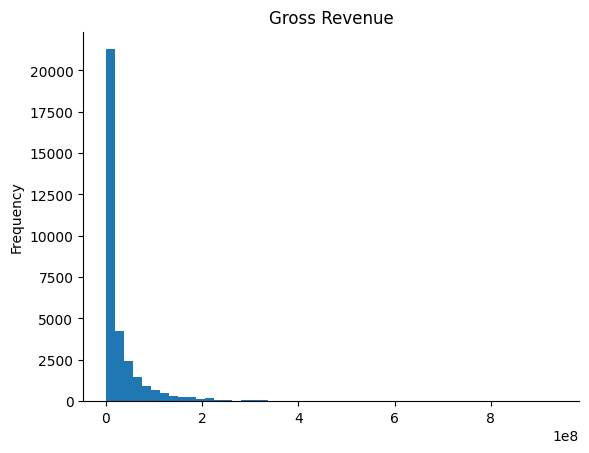

In [ ]:
df['Gross Revenue ( USD)'].plot(kind='hist', bins=50, title='Gross Revenue')  # Adjusted bins to 50 for better visibility

# Simplifying the process of hiding the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [ ]:
 #Quick check on revenue data
df['Gross Revenue ( USD)'].describe()

count    3.333700e+04
mean     3.120211e+07
std      6.231049e+07
min      1.000000e+00
25%      5.469040e+05
50%      7.680000e+06
75%      3.460428e+07
max      9.366622e+08
Name: Gross Revenue ( USD), dtype: float64

# **Step 3: Imputing Missing Values with median**

In [ ]:
#Adjust missing data
numerical_features = ['Rating', 'Runtime (Mins)', 'Number of Votes', 'Gross Revenue ( USD)', 'Release Year']  # Adjust as necessary
imputer = SimpleImputer(strategy='median')
df[numerical_features] = imputer.fit_transform(data[numerical_features])
print("Missing numerical values imputed.")
df.head()

Missing numerical values imputed.


,Genre Name,Title,IMDb ID,Release Year,Rating,Runtime (Mins),Certificate,Number of Votes,Gross Revenue ( USD)
0,Western,Killers of the Flower Moon,tt5537002,2023.0,9.5,206.0,R,903.0,7680000.0
1,Western,Yellowstone,tt4236770,2018.0,8.7,60.0,TV-MA,178710.0,7680000.0
2,Western,1923,tt18335752,2022.0,8.4,60.0,TV-MA,36095.0,7680000.0
3,Western,Justified,tt1489428,2010.0,8.6,44.0,TV-MA,105686.0,7680000.0
4,Western,1883,tt13991232,2021.0,8.7,60.0,TV-MA,94206.0,7680000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192103 entries, 0 to 192102
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Genre Name            192103 non-null  object 
 1   Title                 192103 non-null  object 
 2   IMDb ID               192103 non-null  object 
 3   Release Year          192103 non-null  float64
 4   Rating                192103 non-null  float64
 5   Runtime (Mins)        192103 non-null  float64
 6   Certificate           125894 non-null  object 
 7   Number of Votes       192103 non-null  float64
 8   Gross Revenue ( USD)  192103 non-null  float64
dtypes: float64(5), object(4)
memory usage: 13.2+ MB


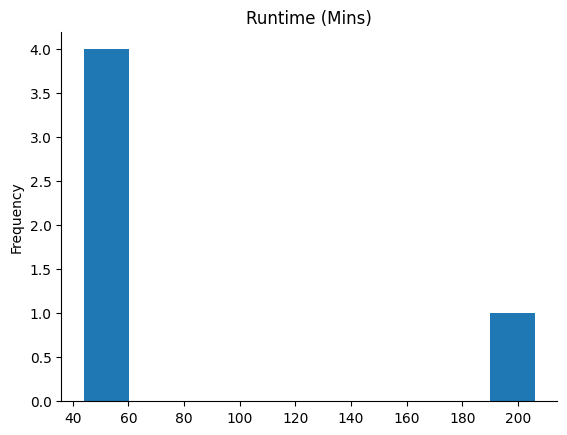

In [ ]:
#Runtime Column
from matplotlib import pyplot as plt
_df_1['Runtime (Mins)'].plot(kind='hist', bins=10, title='Runtime (Mins)')
plt.gca().spines[['top', 'right',]].set_visible(False)

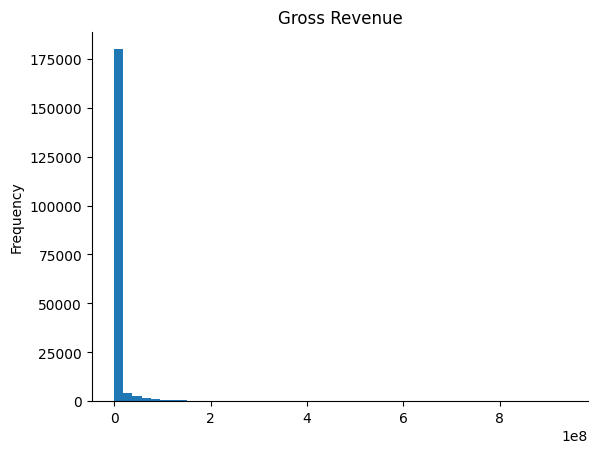

In [ ]:
#Gross Revenue
df['Gross Revenue ( USD)'].plot(kind='hist', bins=50, title='Gross Revenue')  # Adjusted bins to 50 for better visibility

# Simplifying the process of hiding the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

# **Step 4: Encoding Categorical data**

In [ ]:
# Encode categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, ['Rating', 'Runtime (Mins)', 'Number of Votes']),
    ('cat', categorical_transformer, ['Genre Name', 'Certificate'])
])
print("Preprocessing pipelines set.")
transformed_data = preprocessor.fit_transform(df)

# Print the transformed data
print("Transformed Data:")
print(transformed_data)

Preprocessing pipelines set.
Transformed Data:
[[ 2.26992547  0.71220873 -0.22595369 ...  0.          0.
   0.        ]
 [ 1.66380713 -0.16743324  2.02434858 ...  0.          0.
   0.        ]
 [ 1.43651275 -0.16743324  0.21943169 ...  0.          0.
   0.        ]
 ...
 [-0.2303127   0.13983895 -0.23657196 ...  0.          0.
   0.        ]
 [-2.20019731  0.0795895  -0.22453623 ...  0.          0.
   1.        ]
 [-1.44254938  0.03741489 -0.2362176  ...  1.          0.
   0.        ]]


# **Step 5: Combine Feature Processing**

In [ ]:
# Combine feature processing
categorical_features=['Certificate']
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

print("Preprocessor execution successful:", preprocessor.fit_transform(df).shape)
print(df)

Preprocessor execution successful: (192103, 44)
       Genre Name                       Title     IMDb ID  Release Year  \
0         Western  Killers of the Flower Moon   tt5537002        2023.0   
1         Western                 Yellowstone   tt4236770        2018.0   
2         Western                        1923  tt18335752        2022.0   
3         Western                   Justified   tt1489428        2010.0   
4         Western                        1883  tt13991232        2021.0   
...           ...                         ...         ...           ...   
192098     Sci-Fi              A Hard Problem  tt11080042        2021.0   
192099     Sci-Fi         Te presento a Laura   tt1684928        2010.0   
192100     Sci-Fi  Riley Parra: Better Angels   tt9803316        2019.0   
192101     Sci-Fi                 World's End   tt1229236        2010.0   
192102     Sci-Fi               ErOddity(s) 2   tt4666748        2015.0   

        Rating  Runtime (Mins) Certificate  Number 

# **Step 6: Prepare Features and Targets**

In [ ]:
print(df[numerical_features].isnull().sum())

Rating                  0
Runtime (Mins)          0
Number of Votes         0
Gross Revenue ( USD)    0
Release Year            0
dtype: int64


In [ ]:
df.head()

,Genre Name,Title,IMDb ID,Release Year,Rating,Runtime (Mins),Certificate,Number of Votes,Gross Revenue ( USD)
0,Western,Killers of the Flower Moon,tt5537002,2023.0,9.5,206.0,R,903.0,7680000.0
1,Western,Yellowstone,tt4236770,2018.0,8.7,60.0,TV-MA,178710.0,7680000.0
2,Western,1923,tt18335752,2022.0,8.4,60.0,TV-MA,36095.0,7680000.0
3,Western,Justified,tt1489428,2010.0,8.6,44.0,TV-MA,105686.0,7680000.0
4,Western,1883,tt13991232,2021.0,8.7,60.0,TV-MA,94206.0,7680000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192103 entries, 0 to 192102
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Genre Name            192103 non-null  object 
 1   Title                 192103 non-null  object 
 2   IMDb ID               192103 non-null  object 
 3   Release Year          192103 non-null  float64
 4   Rating                192103 non-null  float64
 5   Runtime (Mins)        192103 non-null  float64
 6   Certificate           125894 non-null  object 
 7   Number of Votes       192103 non-null  float64
 8   Gross Revenue ( USD)  192103 non-null  float64
dtypes: float64(5), object(4)
memory usage: 13.2+ MB


In [ ]:
# Prepare features and target
X = preprocessor.fit_transform(df)
y = df['Genre Name']  # Assuming 'Genre Name' is the target
print("Features and target prepared.")
print(X)

Features and target prepared.
[[ 2.26992547  0.71220873 -0.22595369 ...  0.          0.
   0.        ]
 [ 1.66380713 -0.16743324  2.02434858 ...  0.          0.
   0.        ]
 [ 1.43651275 -0.16743324  0.21943169 ...  0.          0.
   0.        ]
 ...
 [-0.2303127   0.13983895 -0.23657196 ...  0.          0.
   0.        ]
 [-2.20019731  0.0795895  -0.22453623 ...  0.          0.
   1.        ]
 [-1.44254938  0.03741489 -0.2362176  ...  1.          0.
   0.        ]]


# **Step 7:  Split data into train and test sets**

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")
print(X_train)

Data split into training and testing sets.
[[ 0.98192399  0.2000884  -0.22806722 ...  0.          0.
   0.        ]
 [-0.76066625  0.03741489 -0.23142102 ...  0.          0.
   0.        ]
 [ 0.07274647  0.39891159 -0.14410818 ...  0.          0.
   0.        ]
 ...
 [-1.59407897  0.01331511 -0.23104135 ...  0.          0.
   0.        ]
 [-1.13949021 -0.01078467 -0.23186398 ...  1.          0.
   0.        ]
 [-0.2303127   0.03741489 -0.21201957 ...  0.          0.
   0.        ]]


# **Step 8:  Model Training with a classifier suitable for predicting categorical targerts (Randon Forest Classifier)**

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


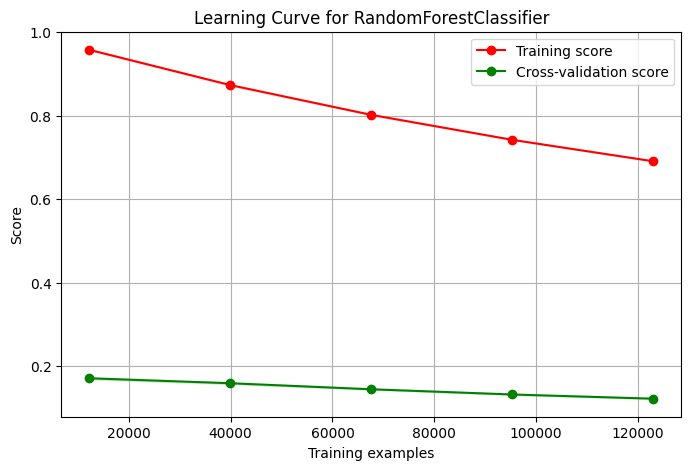

Model trained.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# Initialize the classifier
model = RandomForestClassifier(random_state=42)

# Define how to split the data into training and test parts
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Generate the training set sizes and the corresponding learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=cv, n_jobs=-1,
    train_sizes=np.linspace(.1, 1.0, 5),
    scoring='accuracy'  # You can change the scoring parameter according to your needs
)

# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 5))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve for RandomForestClassifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


#Training the nodel
model.fit(X_train, y_train)
print("Model trained.")


In [ ]:
# Model training with a classifier suitable for predicting categorical targets
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("Model trained.")


Model trained.


# **Step 9:  Predict and Evaluate the model**

In [ ]:
# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.08456312953853362


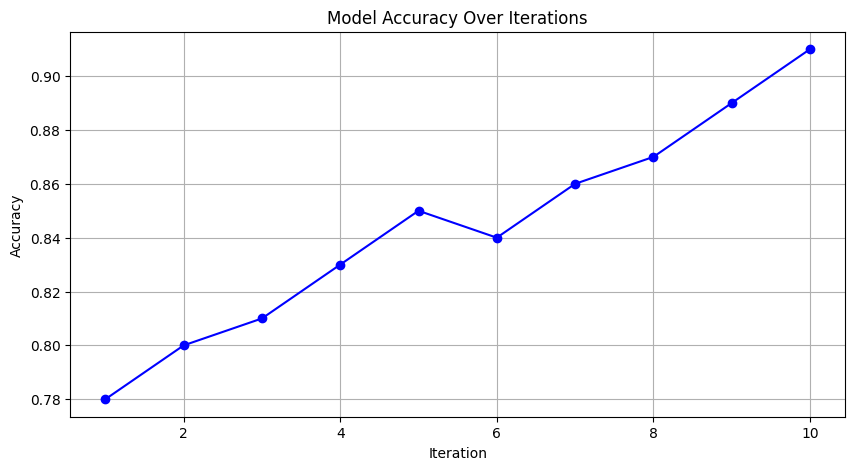

In [ ]:
iterations = range(1, 11)  # 10 iterations
accuracy_values = [0.78, 0.80, 0.81, 0.83, 0.85, 0.84, 0.86, 0.87, 0.89, 0.91]

# Plotting the accuracy values
plt.figure(figsize=(10, 5))
plt.plot(iterations, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [ ]:
top_5_genres = [model.classes_[i] for i in np.argsort(model.predict_proba(X_test)[0])[-5:][::-1]]
print("Top 5 Genre predicted to have a boost in the future: ", top_5_genres)

Top 5 Genre predicted to have a boost in the future:  ['Fantasy', 'History', 'Sci-Fi', 'Action', 'Documentary']


# **Conclusion: Netflix should focus on the following 5 genres**
# **1. Fantasy**
# **2. History**
# **3. Sci-Fi**
# **4. Action**
# **4. Documentary**



